In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt

## Data Preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('D:\\DataSets\\dataset\\training_sets',target_size=(128,128),class_mode='categorical',color_mode= "grayscale")

Found 14918 images belonging to 5 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('D:\\DataSets\\dataset\\test_sets',target_size=(128,128),class_mode='categorical',color_mode= "grayscale")

Found 3728 images belonging to 5 classes.


<function matplotlib.pyplot.show(close=None, block=None)>

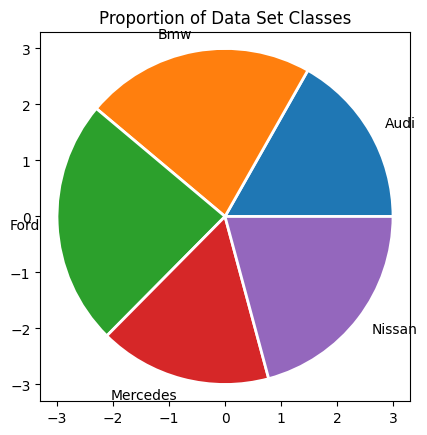

In [41]:
class_counts = []
dataset_path = "dataset/training_sets/"
class_names = os.listdir(dataset_path)
for class_name in class_names:
    class_dir = os.path.join(dataset_path,class_name)
    class_count= len(os.listdir(class_dir))
    class_counts.append(class_count)
plt.pie(class_counts,labels=class_names,frame=True,radius= 3,wedgeprops={"edgecolor": "white", "linewidth":2})
plt.title('Proportion of Data Set Classes')
plt.show

In [6]:
training_set.class_indices

{'Audi': 0, 'Bmw': 1, 'Ford': 2, 'Mercedes': 3, 'Nissan': 4}

## Learning Rate Scheduler

In [7]:
#def scheduler(epoch, lr):
    #if epoch < 20:
        #return lr
    #else:
        #return lr * tf.math.exp(-0.1)

## Building CNN

In [8]:
with tf.device('/device:GPU:0'):
    cnn = tf.keras.models.Sequential()

Fİrst Layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters= 16, kernel_size=3, activation= 'relu', input_shape=[128,128,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.30))

Second Layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters= 32, kernel_size=3, activation= 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.30))

Third Layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size=3, activation= 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.30))

Fourth Layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size=3, activation= 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.30))

Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.30))

Callback

In [15]:
#callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [16]:
csv_logger = tf.keras.callbacks.CSVLogger("training.log")

Output Layer

In [17]:
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

## Training CNN

In [18]:
cnn.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [19]:
cnn.fit(x= training_set , validation_data= test_set, epochs= 100,callbacks=[csv_logger])

Epoch 1/100
467/467 [==============================] - 44s 77ms/step - loss: 1.7801 - accuracy: 0.2853 - val_loss: 1.8975 - val_accuracy: 0.1660
Epoch 2/100
467/467 [==============================] - 17s 36ms/step - loss: 1.4794 - accuracy: 0.3639 - val_loss: 1.5191 - val_accuracy: 0.3219
Epoch 3/100
467/467 [==============================] - 16s 35ms/step - loss: 1.3516 - accuracy: 0.4387 - val_loss: 1.3385 - val_accuracy: 0.4469
Epoch 4/100
467/467 [==============================] - 16s 35ms/step - loss: 1.2478 - accuracy: 0.4942 - val_loss: 1.3876 - val_accuracy: 0.4236
Epoch 5/100
467/467 [==============================] - 16s 35ms/step - loss: 1.1518 - accuracy: 0.5377 - val_loss: 1.1167 - val_accuracy: 0.5577
Epoch 6/100
467/467 [==============================] - 16s 35ms/step - loss: 1.0851 - accuracy: 0.5670 - val_loss: 1.0371 - val_accuracy: 0.6084
Epoch 7/100
467/467 [==============================] - 16s 34ms/step - loss: 1.0247 - accuracy: 0.5969 - val_loss: 0.9832 - val_ac

In [28]:
accuracy_df = pd.read_csv("training.log")
accuracy_df

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.285293,1.780100,0.166041,1.897451
1,1,0.363856,1.479382,0.321888,1.519101
2,2,0.438665,1.351554,0.446888,1.338507
3,3,0.494235,1.247789,0.423551,1.387580
4,4,0.537673,1.151825,0.557672,1.116670
...,...,...,...,...,...
95,95,0.894423,0.293888,0.752414,0.754157
96,96,0.893685,0.294624,0.752951,0.748217
97,97,0.895428,0.292517,0.759388,0.763364
98,98,0.898110,0.285812,0.750805,0.754577


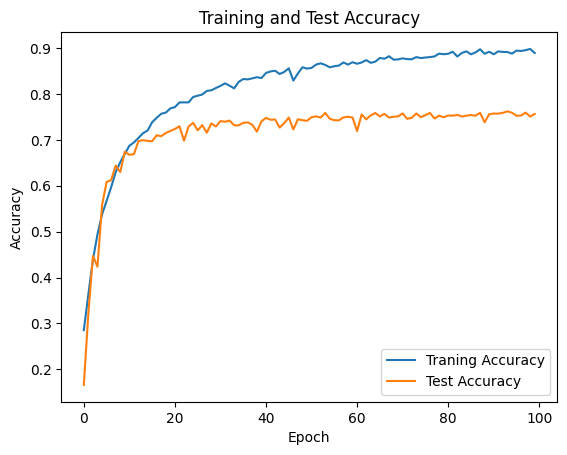

In [36]:
epochs = range(0,len(accuracy_df))
plt.plot(epochs,accuracy_df["accuracy"],label='Traning Accuracy')
plt.plot(epochs,accuracy_df["val_accuracy"],label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

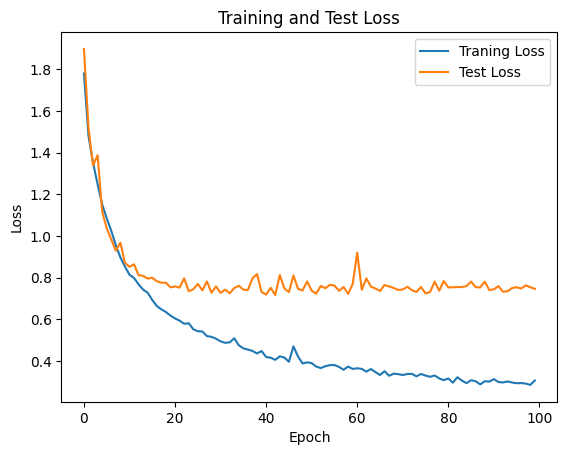

In [37]:
epochs = range(0,len(accuracy_df))
plt.plot(epochs,accuracy_df["loss"],label='Traning Loss')
plt.plot(epochs,accuracy_df["val_loss"],label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()